<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Mawar-Photography/blob/main/Airbnb_Market_Analysis_%26_Real_Estate_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca file CSV
df = pd.read_csv('amenities.csv', sep=';')

In [3]:
# 1. Analisis Dasar
print("1. Informasi Dataset:")
print(df.info())
print("\n2. Statistik Deskriptif:")
print(df.describe())


1. Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int64 
 3   pool        49311 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB
None

2. Statistik Deskriptif:
            hot_tub          pool
count  49311.000000  49311.000000
mean       0.522115      0.081848
std        0.499516      0.274136
min        0.000000      0.000000
25%        0.000000      0.000000
50%        1.000000      0.000000
75%        1.000000      0.000000
max        1.000000      1.000000


In [4]:
# 2. Analisis Ketersediaan Amenities
total_properties = len(df)
hot_tub_count = df['hot_tub'].sum()
pool_count = df['pool'].sum()

In [5]:
print("\n3. Analisis Ketersediaan Amenities:")
print(f"Total Properties: {total_properties}")
print(f"Properties with Hot Tub: {hot_tub_count} ({(hot_tub_count/total_properties*100):.2f}%)")
print(f"Properties with Pool: {pool_count} ({(pool_count/total_properties*100):.2f}%)")


3. Analisis Ketersediaan Amenities:
Total Properties: 49311
Properties with Hot Tub: 25746 (52.21%)
Properties with Pool: 4036 (8.18%)


In [6]:
# 3. Analisis Kombinasi Amenities
df['amenity_combination'] = df.apply(lambda x: f"Hot Tub: {'Yes' if x['hot_tub']==1 else 'No'}, Pool: {'Yes' if x['pool']==1 else 'No'}", axis=1)
combination_counts = df['amenity_combination'].value_counts()

print("\n4. Kombinasi Amenities:")
print(combination_counts)


4. Kombinasi Amenities:
amenity_combination
Hot Tub: Yes, Pool: No     22952
Hot Tub: No, Pool: No      22323
Hot Tub: Yes, Pool: Yes     2794
Hot Tub: No, Pool: Yes      1242
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

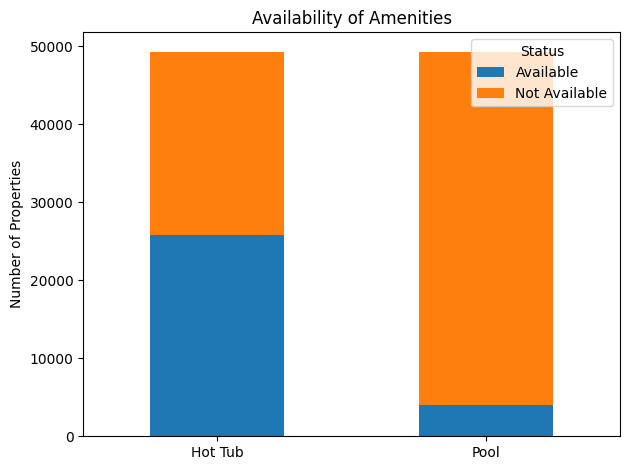

In [7]:
# 4. Visualisasi

# Plot 1: Perbandingan Jumlah Properti dengan Hot Tub dan Pool
plt.figure(figsize=(10, 6))
amenities_comparison = pd.DataFrame({
    'Available': [hot_tub_count, pool_count],
    'Not Available': [total_properties - hot_tub_count, total_properties - pool_count]
}, index=['Hot Tub', 'Pool'])
amenities_comparison.plot(kind='bar', stacked=True)
plt.title('Availability of Amenities')
plt.ylabel('Number of Properties')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

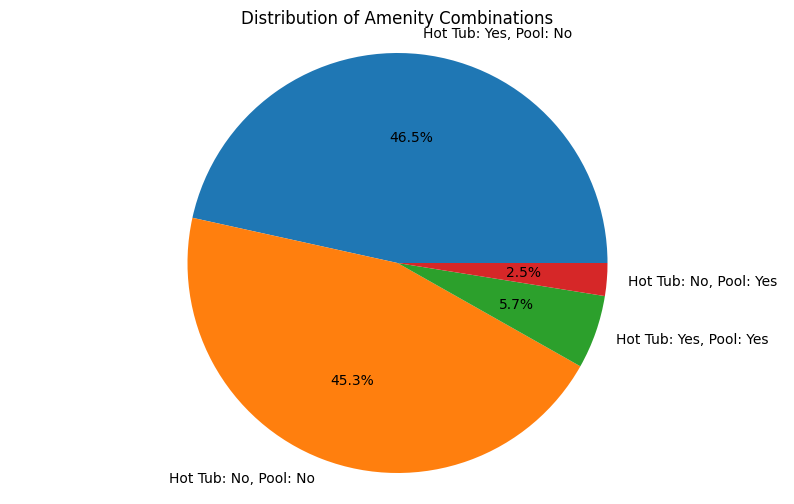

In [8]:
# Plot 2: Pie Chart untuk Kombinasi Amenities
plt.figure(figsize=(10, 6))
plt.pie(combination_counts.values, labels=combination_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Amenity Combinations')
plt.axis('equal')
plt.show()

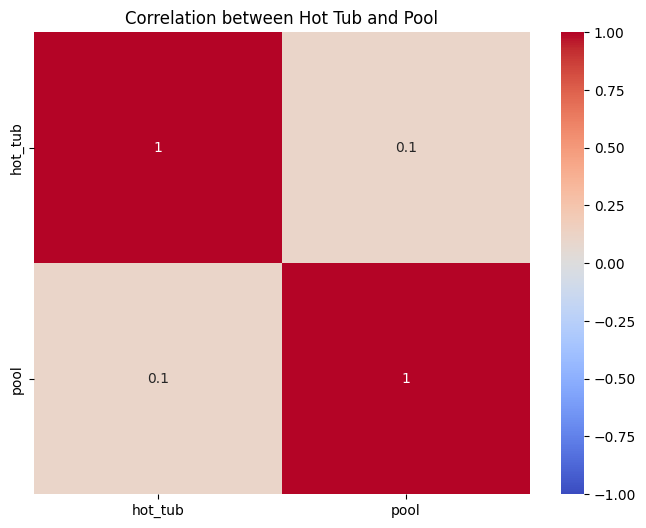

In [9]:
# 5. Correlation Analysis
correlation = df[['hot_tub', 'pool']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Hot Tub and Pool')
plt.show()